## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Recommended style
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
# Create output folder
output_dir = "../reports/EDA/"

output_boxplots = "../reports/EDA/Boxplots/"

output_kde = "../reports/EDA/KDE plots/"

output_csv = "../reports/CSVs/"

output_features = "../reports/Features/"

output_screen = "../screenshots/"

## Load Data

In [3]:
# Load the data
df = pd.read_csv("../data/raw/sample_raw.csv")

In [4]:
# Check shape
print(f"Data shape: {df.shape}")

Data shape: (5000, 12)


In [5]:
# Explore the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          5000 non-null   object 
 1   signup_date          5000 non-null   object 
 2   last_active_date     5000 non-null   object 
 3   monthly_txn_count    5000 non-null   int64  
 4   monthly_revenue      5000 non-null   float64
 5   avg_txn_value        5000 non-null   float64
 6   recency_days         5000 non-null   int64  
 7   product_count        5000 non-null   int64  
 8   is_premium           5000 non-null   int64  
 9   complaints_last_6m   5000 non-null   int64  
 10  avg_session_minutes  5000 non-null   float64
 11  churn_3m             5000 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 468.9+ KB
None


In [6]:
# Check the columns in the dataset
print("Columns in the dataset: \n")
df.columns

Columns in the dataset: 



Index(['customer_id', 'signup_date', 'last_active_date', 'monthly_txn_count',
       'monthly_revenue', 'avg_txn_value', 'recency_days', 'product_count',
       'is_premium', 'complaints_last_6m', 'avg_session_minutes', 'churn_3m'],
      dtype='object')

In [7]:
# Check the summary statistics

summary = df.describe().T
display(summary)

summary.to_csv(output_csv + "summary_statistics.csv")

,count,mean,std,min,25%,50%,75%,max
monthly_txn_count,5000.0,2.973600,1.718922,0.000000,2.000000,3.000000,4.000000,12.000000
monthly_revenue,5000.0,600.850103,448.133272,0.000000,273.147682,510.847660,826.507952,3086.339538
avg_txn_value,5000.0,201.026528,80.235102,0.253601,146.460122,198.769898,253.645662,494.997344
recency_days,5000.0,59.961800,34.550512,1.000000,30.000000,60.000000,90.000000,119.000000
product_count,5000.0,1.982600,0.820995,1.000000,1.000000,2.000000,3.000000,3.000000
is_premium,5000.0,0.194000,0.395468,0.000000,0.000000,0.000000,0.000000,1.000000
complaints_last_6m,5000.0,0.102000,0.323136,0.000000,0.000000,0.000000,0.000000,4.000000
avg_session_minutes,5000.0,11.995106,3.940719,0.210535,9.338092,11.990137,14.674444,27.754012
churn_3m,5000.0,0.185600,0.388822,0.000000,0.000000,0.000000,0.000000,1.000000


In [8]:
# Check the first few rows of the dataset
df.head()

,customer_id,signup_date,last_active_date,monthly_txn_count,monthly_revenue,avg_txn_value,recency_days,product_count,is_premium,complaints_last_6m,avg_session_minutes,churn_3m
0,CUST_00000,2022-06-12,2025-11-08,3,979.011076,326.337025,15,2,0,0,15.069739,1
1,CUST_00001,2023-09-30,2025-09-20,3,605.333238,201.777746,64,3,0,0,10.288828,0
2,CUST_00002,2024-04-13,2025-09-22,3,629.332600,209.777533,62,1,0,0,9.938257,1
3,CUST_00003,2024-10-06,2025-08-01,1,140.073878,140.073878,114,3,0,0,8.886472,0
4,CUST_00004,2021-12-29,2025-11-17,2,371.794294,185.897147,6,2,1,0,16.803571,0


## Data Cleaning And Preprocessing

In [9]:
# Check missing values

missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values in each column:\n", missing)

missing.to_csv(output_csv + "missing_values.csv")

Missing values in each column:
 customer_id            0
signup_date            0
last_active_date       0
monthly_txn_count      0
monthly_revenue        0
avg_txn_value          0
recency_days           0
product_count          0
is_premium             0
complaints_last_6m     0
avg_session_minutes    0
churn_3m               0
dtype: int64


In [10]:
# Check NaN Values
print("Total NaN values in the dataset:\n", df.isna().sum())

Total NaN values in the dataset:
 customer_id            0
signup_date            0
last_active_date       0
monthly_txn_count      0
monthly_revenue        0
avg_txn_value          0
recency_days           0
product_count          0
is_premium             0
complaints_last_6m     0
avg_session_minutes    0
churn_3m               0
dtype: int64


In [11]:
# Check duplicates in the dataset
duplicates = df.duplicated().sum()
print(f"Total duplicate rows in the dataset: {duplicates}")

Total duplicate rows in the dataset: 0


## Data Exploration

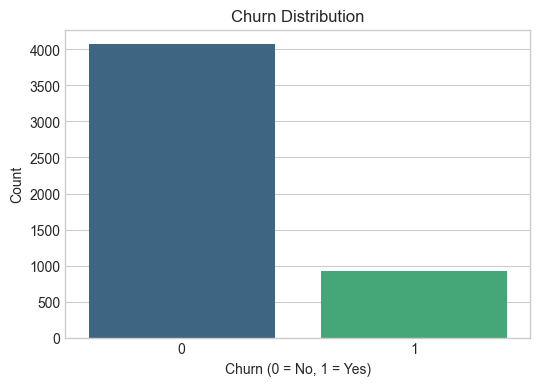

churn_3m
0    81.44
1    18.56
Name: proportion, dtype: float64

In [12]:
# Churn Distribution

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="churn_3m", palette="viridis")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")

plt.savefig(output_dir + "churn_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

df["churn_3m"].value_counts(normalize=True) * 100

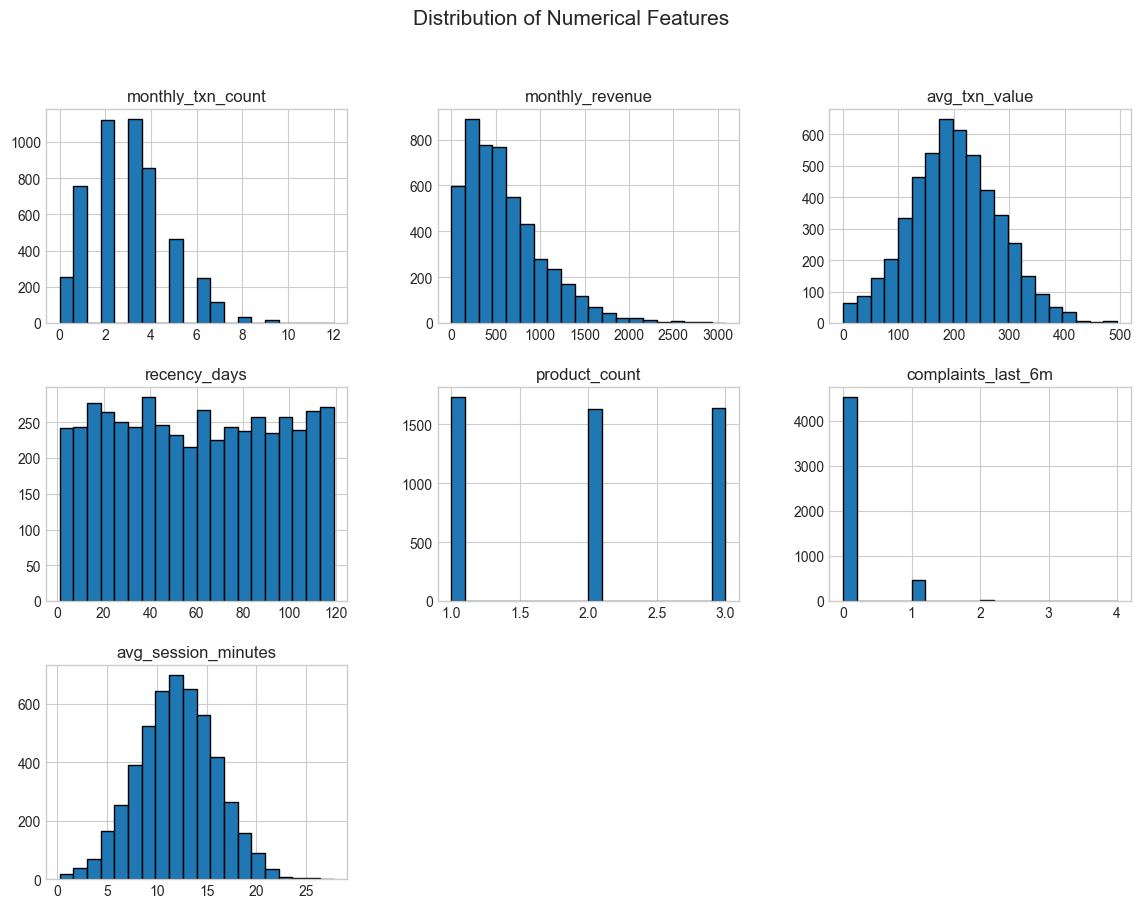

In [13]:
# Numerical Features Distribution

num_cols = [
    "monthly_txn_count","monthly_revenue","avg_txn_value",
    "recency_days","product_count","complaints_last_6m",
    "avg_session_minutes"
]

df[num_cols].hist(figsize=(14,10), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", size=15)

plt.savefig(output_dir + "numerical_distributions.png", dpi=300, bbox_inches="tight")
plt.show()

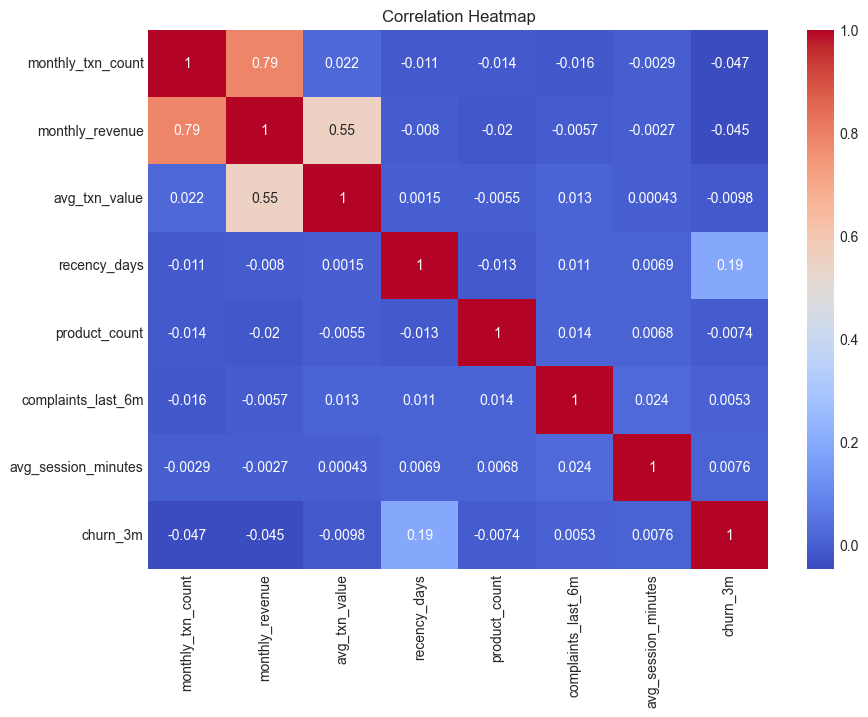

In [14]:
# Correlation Heatmap

plt.figure(figsize=(10,7))
corr = df[num_cols + ["churn_3m"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

plt.savefig(output_dir + "correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

In [15]:
# Boxplots vs Churn (Auto Save for Each Feature)

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="churn_3m", y=col, palette="Set2")
    plt.title(f"{col} vs Churn")
    
    plt.savefig(output_boxplots + f"{col}_vs_churn_boxplot.png", dpi=300, bbox_inches="tight")
    plt.close()  # prevents notebook from getting heavy

print("Saved all boxplots.")

Saved all boxplots.


In [16]:
# KDE Distributions for Key Features

kde_features = ["recency_days", "monthly_revenue", "avg_session_minutes"]

for col in kde_features:
    plt.figure(figsize=(7,5))
    sns.kdeplot(data=df, x=col, hue="churn_3m", fill=True)
    plt.title(f"{col} Distribution by Churn")

    plt.savefig(output_kde + f"{col}_kde_churn.png", dpi=300, bbox_inches="tight")
    plt.close()

print("Saved all KDE plots.")

Saved all KDE plots.


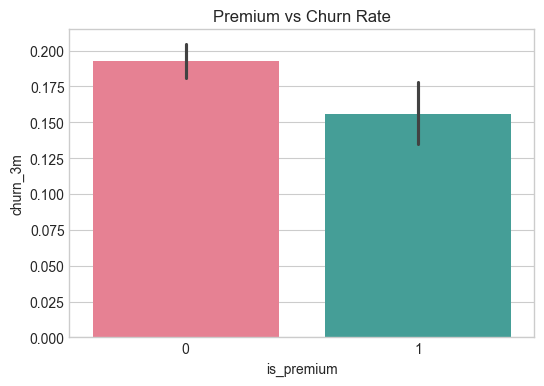

In [17]:
# Categorical Feature: Premium vs Churn

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="is_premium", y="churn_3m", palette="husl")
plt.title("Premium vs Churn Rate")

plt.savefig(output_dir + "premium_vs_churn.png", dpi=300, bbox_inches="tight")
plt.show()

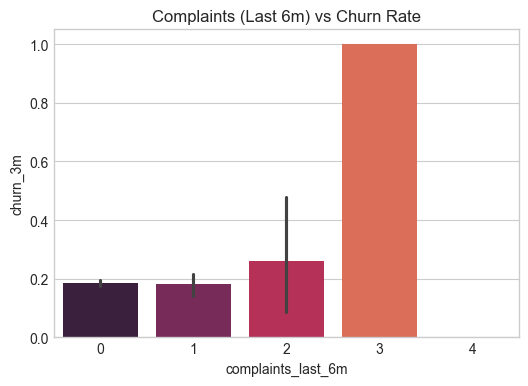

In [18]:
# Complaints vs Churn

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="complaints_last_6m", y="churn_3m", palette="rocket")
plt.title("Complaints (Last 6m) vs Churn Rate")

plt.savefig(output_dir + "complaints_vs_churn.png", dpi=300, bbox_inches="tight")
plt.show()

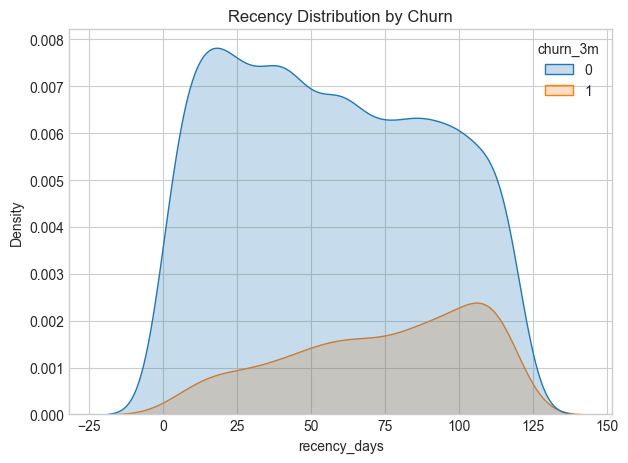

In [19]:
# Recency Analysis

plt.figure(figsize=(7,5))
sns.kdeplot(data=df, x="recency_days", hue="churn_3m", fill=True)
plt.title("Recency Distribution by Churn")

plt.savefig(output_screen + "Recency_Distribution_By_Churn.png", dpi=300, bbox_inches="tight")
plt.show()


# Interpretation hint:
# Higher recency_days → higher churn probability.

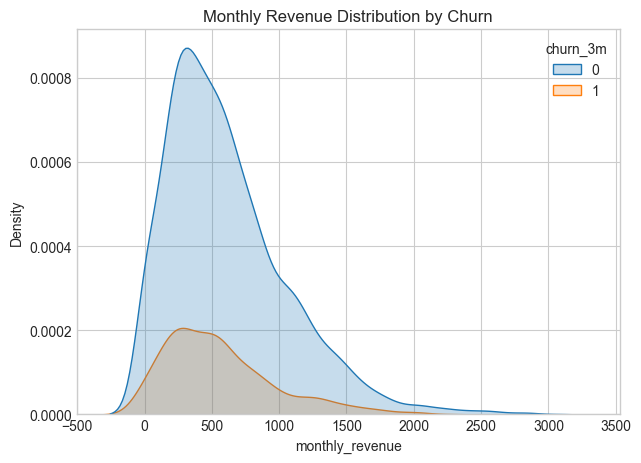

In [20]:
# Revenue vs Churn

plt.figure(figsize=(7,5))
sns.kdeplot(data=df, x="monthly_revenue", hue="churn_3m", fill=True)
plt.title("Monthly Revenue Distribution by Churn")

plt.savefig(output_dir + "Monthly Revenue Distribution By Churn.png", dpi=300, bbox_inches="tight")
plt.show()

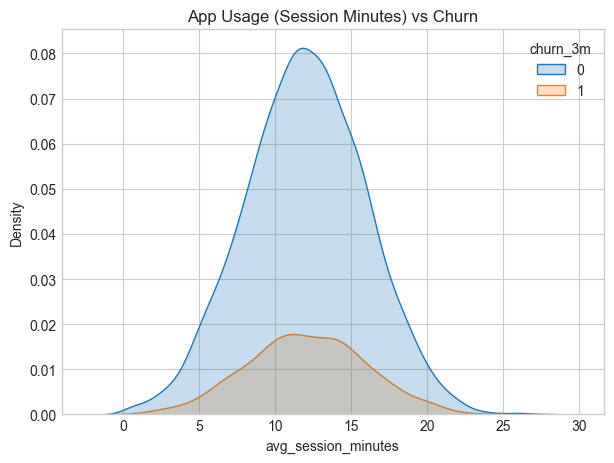

In [21]:
# Session Time vs Churn

plt.figure(figsize=(7,5))
sns.kdeplot(data=df, x="avg_session_minutes", hue="churn_3m", fill=True)
plt.title("App Usage (Session Minutes) vs Churn")

plt.savefig(output_dir + "App Usage (Session Minutes) vs Churn.png", dpi=300, bbox_inches="tight")
plt.show()

In [22]:
# Save Feature Means vs Churn

mean_comparison = df.groupby("churn_3m")[num_cols].mean()
mean_comparison.to_csv(output_csv + "feature_means_vs_churn.csv")

mean_comparison

,monthly_txn_count,monthly_revenue,avg_txn_value,recency_days,product_count,complaints_last_6m,avg_session_minutes
churn_3m,,,,,,,
0,3.011788,610.439664,201.401811,56.764980,1.985511,0.101179,11.980860
1,2.806034,558.771768,199.379808,73.989224,1.969828,0.105603,12.057619


In [23]:
# Final EDA Summary (Export to Text File)

summary_text = """
Key EDA Insights
----------------
1. High recency_days strongly correlates with churn.
2. Low transaction frequency and revenue increase churn risk.
3. Premium customers churn significantly less.
4. Customers with complaints in last 6 months have higher churn.
5. Users with higher app session times have lower churn.
"""

with open(output_features + "EDA_Summary.txt", "w") as f:
    f.write(summary_text)

print(summary_text)


Key EDA Insights
----------------
1. High recency_days strongly correlates with churn.
2. Low transaction frequency and revenue increase churn risk.
3. Premium customers churn significantly less.
4. Customers with complaints in last 6 months have higher churn.
5. Users with higher app session times have lower churn.

